In [254]:
import random
import numpy as np
import pandas as pd
from numpy.random import choice
import datetime
import pickle
import json

In [275]:
random.seed(4)
np.random.seed(4)

In [276]:
def get_random_with_weight(data):
    weigts = [i['weight'] for i in data]
    probs = [i/np.sum(weigts) for i in weigts] 
    return data[choice(len(data), 1, p=probs)[0]]

In [376]:
f = open('word_rus.txt')
words = f.readlines()
words = [i.strip() for i in words]

In [386]:
words_subset = [words[random.randint(0, len(words)-1)] for i in range(40)]
def get_random_russian_word():
    return words_subset[random.randint(0, len(words_subset)-1)]

In [400]:
purchase_types = [
    {
        'name': 'Покупка в супермаркете',
        'min': 20,
        'max': 10000,
        'weight': 20,
    },
    {
        'name': 'АЗС',
        'min': 100,
        'max': 2000,
        'weight': 10,
    },
    {
        'name': 'Снятие наличных',
        'min': 500,
        'max': 15000,
        'weight': 50,
    },
    {
        'name': 'Покупка *',
        'min': 0,
        'max': 150000,
        'weight': 70,
    },
]

with open('purchase_types.pkl', 'wb') as handle:
    pickle.dump(purchase_types, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
purchase_types = None
with open('purchase_types.pkl', 'rb') as handle:
    purchase_types = pickle.load(handle)

In [478]:
subscribtion_types = [
    {
        'id': 0,
        'name':
        'Amediateka',
        'description':
        'Сервис для просмотра фильмов',
        'logo':
        'http://apps4all.ru/media/ru/blog/56782d125a5380.37100262.png',
        'min': 350*100,
        'max': 370*100,
        'first_payment': 359*100,
        'payment_days': [26],
        'max_cost': 15,
        'active': True,
        'live_time_months': 3,
        'url': 'https://youtube.com',
        'stars': 4,
        'recomendations': [subscribtion_types[1], subscribtion_types[2]],
        'comments': [{
            'user': 'Игорь',
            'text': 'Отличная замена телику',
        }, {
            'user': 'Иван',
            'text': 'Лучший сервис на планете',
        }, {
            'user': 'Коля',
            'text': 'Вполне неплохо',
        }],
    },
    {
        'id': 1,
        'name': 'ЖКХ',
        'description':
        'Комунальные услуги',
        'logo':
        'http://consalt-expert.ru/sites/default/files/languages/SRO_JKH.JPG',
        'min': 4000*100,
        'max': 7000*100,
        'first_payment': 5341*100,
        'payment_days': [12],
        'max_cost': 50,
        'url': 'https://pgu.mos.ru',
        'stars':
        1,
        'comments': [{
            'user': 'Игорь',
            'text': 'Говна кусок',
        }, {
            'user':
            'Иван',
            'text':
            'АААААААА ЧТО ЭТО ЗА ХРЕНОТЕНЬ?????!!?!?!?! МНЕ ВЫСТАВИЛИ СЧЁТ ЗА КОШКУ В ГОРШКЕ',
        }, {
            'user': 'Коля',
            'text': 'СРАНЬ!!!!!!!!!!',
        }],
        'live_time_months': 24,
        'active': False,
        'recomendations': [subscribtion_types[0], subscribtion_types[2]]
    },
    {
        'id': 2,
        'name': 'Netflix',
        'description':
        'Американский сервис для просмотра фильмов и сериалов',
        'logo':
        'https://lh5.googleusercontent.com/-9El0rLwfX5E/AAAAAAAAAAI/AAAAAAAAJsg/6oFhatwR0Jg/s0-c-k-no-ns/photo.jpg',
        'min': 600*100,
        'max': 900*100,
        'first_payment': 650*100,
        'payment_days': [31],
        'max_cost': 10,
        'url': 'https://www.netflix.com/ru/',
        'stars':
        3,
        'comments': [{
            'user': 'Игорь',
            'text': 'Отличная замена телику',
        }, {
            'user': 'Иван',
            'text': 'Лучший сервис на планете',
        }, {
            'user': 'Коля',
            'text': 'Вполне неплохо',
        }],
        'live_time_months': 9,
        'active': False,
        'recomendations': [subscribtion_types[0], subscribtion_types[3]]
    },
    {
        'id': 3,
        'name': 'Qclean',
        'description':
        'Уборка в квартире',
        'logo':
        'https://pbs.twimg.com/profile_images/621057579507036160/x_2TDJLi.png',
        'min': 2000*100,
        'max': 3000*100,
        'first_payment': 2650*100,
        'payment_days': [1,14,20,31],
        'max_cost': 10,
        'url': 'https://qlean.ru/',
        'stars':
        5,
        'comments': [{
            'user': 'Игорь',
            'text': 'Отличная замена телику',
        }, {
            'user': 'Иван',
            'text': 'Лучший сервис на планете',
        }, {
            'user': 'Коля',
            'text': 'Вполне неплохо',
        }],
        'live_time_months': 9,
        'active': True,
        'recomendations': [subscribtion_types[0], subscribtion_types[2]]
    },
]

with open('subscribtion_types.pkl', 'wb') as handle:
    pickle.dump(subscribtion_types, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
subscribtion_types = None
with open('subscribtion_types.pkl', 'rb') as handle:
    subscribtion_types = pickle.load(handle)

In [443]:
card_ids = [random.randint(0, int("9" * 16)) for i in range(10)]
card_ids = [
    9731875055002762, 7267061812381166, 216436350147307]
cards_info = {}
female_names = ['Анна', 'Екатерина']
male_names = ['Никита', 'Алексей']
user_photos = {
    'Анна': 'http://f.totruok.ru/Monosnap_2017-09-16_19-53-14.png',
    'Екатерина': 'http://f.totruok.ru/Monosnap_2017-09-16_19-47-05.png',
    'Никита': 'http://f.totruok.ru/Monosnap_2017-09-16_19-55-29.png',
    'Алексей': 'http://f.totruok.ru/Monosnap_2017-09-16_19-55-56.png',
}

for card_id in card_ids:
    user_shopcart = {
        i: [get_random_russian_word() for i in range(random.randint(4, 20))]
        for i in user_photos.keys()
    }
    _card = {}
    user_shopcart = {
        i: [get_random_russian_word() for i in range(random.randint(4, 20))]
        for i in user_photos.keys()
    }
    _card['id'] = card_id
    _card['balance'] = random.randint(0, 1000000000)
    _card['cur'] = "RUB"
    _card['owners'] = [
        female_names[random.randint(0, len(female_names) - 1)],
        male_names[random.randint(0, len(male_names) - 1)]
    ]
    _transactions = []

    for owner in _card['owners']:
        # generate simple purchases
        for _index in range(1300):
            purchases_type = get_random_with_weight(purchase_types)
            transaction_date = random.randint(1451606400, 1504224000)
            _transaction = {
                'TransactionPlace':
                purchases_type['name'].replace('*', user_shopcart[owner][
                    random.randint(0, len(user_shopcart[owner]) - 1)]),
                'TransactionSum':
                '-{}'.format(
                    random.randint(purchases_type['min'], purchases_type[
                        'max'])),
                'TransactionDate':
                datetime.datetime.fromtimestamp(transaction_date).strftime(
                    '%Y.%m.%d'),
                'TransactionOwner':
                owner,
                'TransactionPhotoUrl':
                user_photos[owner],
                'TransactionSubscrition':
                None
            }
            _transactions.append(_transaction)
        # generate income
        for _index in range(300):
            transaction_date = random.randint(1451606400, 1504224000)
            _transaction = {
                'TransactionPlace':
                'Пополнение',
                'TransactionSum':
                '+{}'.format(random.randint(100, 100000) * 100),
                'TransactionDate':
                datetime.datetime.fromtimestamp(transaction_date).strftime(
                    '%Y.%m.%d'),
                'TransactionOwner':
                owner,
                'TransactionPhotoUrl':
                user_photos[owner],
                'TransactionSubscrition':
                None
            }
            _transactions.append(_transaction)
    # generate subscribtions purchases
    for sub in subscribtion_types:
        break_flag = False
        for year in range(2015, 2018):
            if break_flag:
                break
            for month in range(1, 13):
                if break_flag:
                    break
                for day in range(1, 32):
                    if (year == 2017) and (month == 9) and (day == 1):
                        break_flag = True
                        break
                    if day in sub['payment_days']:
                        _transaction = {
                            'TransactionPlace':
                            sub['name'],
                            'TransactionSum':
                            '-{}'.format(random.randint(sub['min'], sub['max'])),
                            'TransactionDate':
                            '{}.{:02}.{:02}'.format(year, month, day),
                            'TransactionOwner':
                            'Автоплатёж',
                            'TransactionPhotoUrl':
                            'https://i.pinimg.com/originals/9e/e4/a6/9ee4a64469336c1109775f11f25363ff.png',
                            'TransactionSubscrition':
                            sub
                        }
                        _transactions.append(_transaction)

    random.shuffle(_transactions)
    _card['transactions'] = sorted(
        _transactions, key=lambda k: k['TransactionDate'], reverse=True)
    _card['subscribtions'] = subscribtion_types
    cards_info[_card['id']] = _card

In [444]:
with open('cards_info.pkl', 'wb') as handle:
    pickle.dump(cards_info, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [434]:
len(cards_info[9731875055002762]['transactions'])

2624

In [445]:
# cards_info[9731875055002762]['transactions']

In [452]:
_df = pd.DataFrame(cards_info[9731875055002762]['transactions'])

In [455]:
_df.columns

Index(['TransactionDate', 'TransactionOwner', 'TransactionPhotoUrl',
       'TransactionPlace', 'TransactionSubscrition', 'TransactionSum'],
      dtype='object')

In [473]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 31.,  39.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ -148759.  ,   -55599.41,    37560.18,   130719.77,   223879.36,
          317038.95,   410198.54,   503358.13,   596517.72,   689677.31,
          782836.9 ,   875996.49,   969156.08,  1062315.67,  1155475.26,
         1248634.85,  1341794.44,  1434954.03,  1528113.62,  1621273.21,
         1714432.8 ,  1807

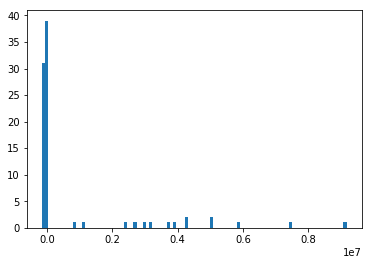

In [477]:
plt.hist(
    _df[(_df['TransactionDate'] >= '2017.08.01') &
        (_df['TransactionOwner'] == 'Екатерина')]['TransactionSum'].astype(
            int),
    bins=100)

In [467]:
_df[(_df['TransactionDate'] >= '2017.08.01') &
    (_df['TransactionOwner'] == 'Алексей')]['TransactionSum'].astype(
        int).sum()

70351912

In [468]:
_df[(_df['TransactionDate'] >= '2017.08.01') &
    (_df['TransactionOwner'] == 'Екатерина')]['TransactionSum'].astype(
        int).sum()

57931774

In [450]:
cards_info[9731875055002762]['owners']

['Екатерина', 'Алексей']

In [ ]:
users = []

for card in card_info:
    card_info[users] = ["{}_{}".format(card, i) for i in cards_info3[9731875055002762]['owners']]
    for i in card_info[users]:
        _df = pd.DataFrame(cards_info[9731875055002762]['transactions'])
        _df
        

In [ ]:
# сделать расстояние между пользователями
# сделать xboost для прежсказания трат в следующем месяце